<a href="https://colab.research.google.com/github/sundar-nallalagappan/Coursera_NLP_assignments/blob/main/Word_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("sairam")

sairam


In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
# Define the lyrics of the song
data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."
print(data)

In the town of Athy one Jeremy Lanigan 
 Battered away til he hadnt a pound. 
His father died and made him a man again 
 Left him a farm and ten acres of ground. 
He gave a grand party for friends and relations 
Who didnt forget him when come to the wall, 
And if youll but listen Ill make your eyes glisten 
Of the rows and the ructions of Lanigans Ball. 
Myself to be sure got free invitation, 
For all the nice girls and boys I might ask, 
And just in a minute both friends and relations 
Were dancing round merry as bees round a cask. 
Judy ODaly, that nice little milliner, 
She tipped me a wink for to give her a call, 
And I soon arrived with Peggy McGilligan 
Just in time for Lanigans Ball. 
There were lashings of punch and wine for the ladies, 
Potatoes and cakes; there was bacon and tea, 
There were the Nolans, Dolans, OGradys 
Courting the girls and dancing away. 
Songs they went round as plenty as water, 
The harp that once sounded in Taras old hall,
Sweet Nelly Gray and The Rat Ca

In [35]:
corpus = data.split('\n')
print(f"number of sentences: {len(corpus)}")


number of sentences: 64


In [5]:
corpus[0:5]

['In the town of Athy one Jeremy Lanigan ',
 ' Battered away til he hadnt a pound. ',
 'His father died and made him a man again ',
 ' Left him a farm and ten acres of ground. ',
 'He gave a grand party for friends and relations ']

In [42]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index
print(f"Number of unique words in vocab {len(word_index)}")
word_index

# Define the total words. You add 1 for the index `0` which is just the padding token.
total_words = len(word_index) + 1

Number of unique words in vocab 262


In [ ]:
sequences = tokenizer.texts_to_sequences(corpus)
sequences

In [23]:
max_seq_len = np.max([len(row) for row in sequences])

In [20]:
input_sequences = []

for row in corpus:
  token_text = tokenizer.texts_to_sequences([row])[0]

  for i in range(len(token_text)):
    n_gram_seq = token_text[:i+1]
    input_sequences.append(n_gram_seq)

In [ ]:
input_sequences

In [24]:
padded = pad_sequences(input_sequences, maxlen=max_seq_len, padding="pre")
padded

array([[  0,   0,   0, ...,   0,   0,   4],
       [  0,   0,   0, ...,   0,   4,   2],
       [  0,   0,   0, ...,   4,   2,  66],
       ...,
       [  0,   0,   0, ...,  60, 262,  13],
       [  0,   0,   0, ..., 262,  13,   9],
       [  0,   0,   0, ...,  13,   9,  10]], dtype=int32)

In [26]:
padded[0:10]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  4,  2, 66],
       [ 0,  0,  0,  0,  0,  0,  0,  4,  2, 66,  8],
       [ 0,  0,  0,  0,  0,  0,  4,  2, 66,  8, 67],
       [ 0,  0,  0,  0,  0,  4,  2, 66,  8, 67, 68],
       [ 0,  0,  0,  0,  4,  2, 66,  8, 67, 68, 69],
       [ 0,  0,  0,  4,  2, 66,  8, 67, 68, 69, 70],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 71],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 71, 40]], dtype=int32)

In [34]:
Xs = padded[:,:-1]
labels = padded[:,-1]

Xs.shape, labels.shape

((517, 10), (517,))

In [44]:
Ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [48]:
labels[0], Ys[0]

(4,
 array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        

In [56]:
ele = 6
print(Xs[ele])
print(tokenizer.sequences_to_texts([Xs[ele]]))
print(Ys[ele])

[ 0  0  0  0  4  2 66  8 67 68]
['in the town of athy one']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [62]:
tokenizer.index_word.get(np.argmax(Ys[ele]))

'jeremy'

Build Model

In [64]:
Ys.shape[1], total_words

(263, 263)

In [70]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_seq_len-1))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(Ys.shape[1], "softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 64)            16832     
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 263)               17095     
                                                                 
Total params: 58,759
Trainable params: 58,759
Non-trainable params: 0
_________________________________________________________________


In [71]:
history = model.fit(Xs, Ys, epochs=500, batch_size=8)

Epoch 1/500
65/65 [==============================] - 5s 11ms/step - loss: 5.5437 - accuracy: 0.0406
Epoch 2/500
65/65 [==============================] - 1s 11ms/step - loss: 5.2181 - accuracy: 0.0484
Epoch 3/500
65/65 [==============================] - 1s 11ms/step - loss: 5.0557 - accuracy: 0.0580
Epoch 4/500
65/65 [==============================] - 1s 11ms/step - loss: 4.9572 - accuracy: 0.0522
Epoch 5/500
65/65 [==============================] - 1s 11ms/step - loss: 4.8627 - accuracy: 0.0580
Epoch 6/500
65/65 [==============================] - 1s 11ms/step - loss: 4.7546 - accuracy: 0.0522
Epoch 7/500
65/65 [==============================] - 1s 11ms/step - loss: 4.6330 - accuracy: 0.0716
Epoch 8/500
65/65 [==============================] - 1s 13ms/step - loss: 4.5309 - accuracy: 0.0832
Epoch 9/500
65/65 [==============================] - 1s 20ms/step - loss: 4.4216 - accuracy: 0.0870
Epoch 10/500
65/65 [==============================] - 1s 19ms/step - loss: 4.3118 - accuracy: 0.1064

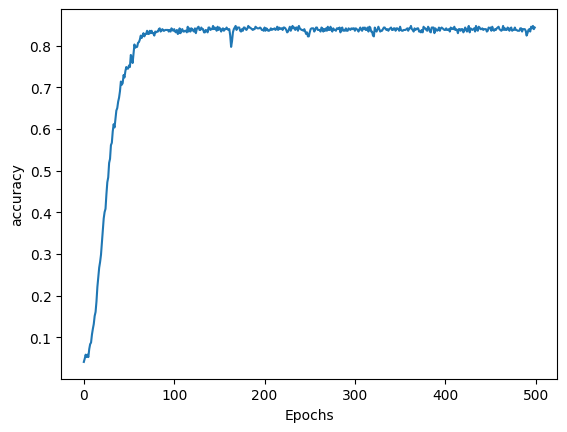

In [72]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

# Predict the words for test sentence

In [79]:
seed_text = "Sai went to Dublin"

seed_token = tokenizer.texts_to_sequences([seed_text])[0]
padded_seed_token = pad_sequences([seed_token], maxlen=max_seq_len-1, padding="pre")
padded_seed_token

array([[  0,   0,   0,   0,   0,   0,   0, 134,  13,  59]], dtype=int32)

In [81]:
y_pred = model.predict(padded_seed_token)

1/1 [==============================] - 0s 34ms/step


In [87]:
np.argmax(y_pred, axis=-1)[0]

5

In [83]:
tokenizer.index_word.get((np.argmax(y_pred)))

'all'

In [91]:
tokenizer.index_word.get(np.argmax(model.predict(padded_seed_token)))

1/1 [==============================] - 0s 35ms/step


'all'

In [93]:
num_words = 10
seed_text = "Sai went to Dublin"

for i in range(num_words):
  seed_token = tokenizer.texts_to_sequences([seed_text])[0]
  padded_seed_token = pad_sequences([seed_token], maxlen=max_seq_len-1, padding="pre")
  #padded_seed_token
  y_prob = model.predict(padded_seed_token)
  Y_pred = tokenizer.index_word.get((np.argmax(y_prob)))

  if np.argmax(y_prob) != 0: #0 is  is 0 because that is just the padding.
    print(Y_pred)
    seed_text += " " + Y_pred


1/1 [==============================] - 0s 24ms/step
all
1/1 [==============================] - 0s 22ms/step
around
1/1 [==============================] - 0s 21ms/step
in
1/1 [==============================] - 0s 35ms/step
couples
1/1 [==============================] - 0s 30ms/step
and
1/1 [==============================] - 0s 22ms/step
groups
1/1 [==============================] - 0s 25ms/step
groups
1/1 [==============================] - 0s 24ms/step
relations
1/1 [==============================] - 0s 26ms/step
old
1/1 [==============================] - 0s 24ms/step
hall


In [94]:
seed_text

'Sai went to Dublin all around in couples and groups groups relations old hall'